In [55]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import  scipy.stats as stats
from scipy.stats import pareto, norm, laplace,binom


# **Inversion Algorithm**

## *1.Continuous case*
If $X$ has CDF $F$, take:

$$
X = F^{-1}(U), \quad U \sim \mathcal{U}[0,1].
$$

- Exponential

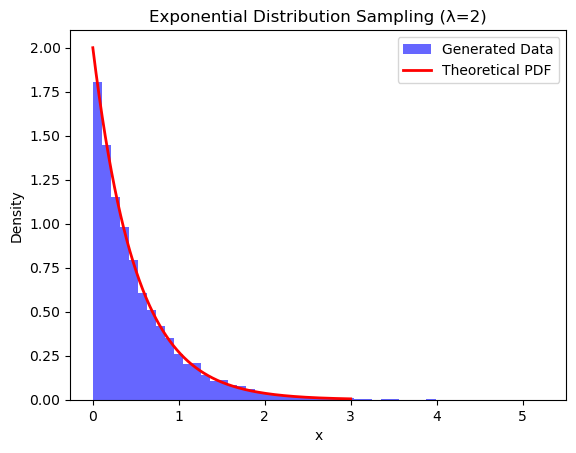

In [ ]:
# Parameters
lambda_val = 2  # Rate parameter for Exponential(λ)
# Generate uniform random numbers
U = np.random.uniform(0, 1, 10000)
# Apply inverse transformation
X = -np.log( U) / lambda_val
# Plot histogram to compare with theoretical PDF
plt.hist(X, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")
# Plot theoretical density function
x_vals = np.linspace(0, 3, 1000)
pdf = lambda_val * np.exp(-lambda_val * x_vals)
plt.plot(x_vals, pdf, 'r', lw=2, label="Theoretical PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Exponential Distribution Sampling (λ=2)")
plt.legend()
plt.show()


- Pareto

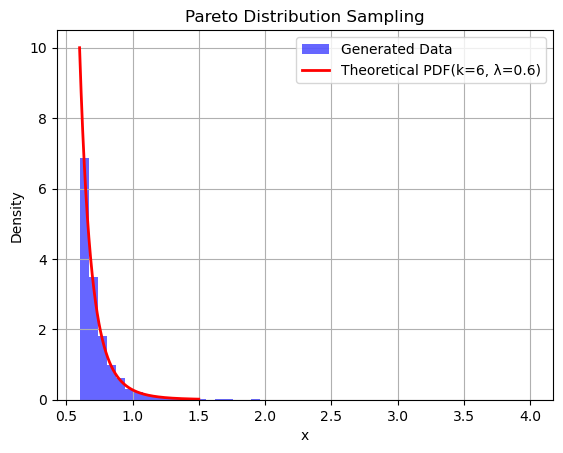

In [8]:

lmb=0.6
k=6
U = np.random.uniform(0, 1, 10000)
X = lmb/U**(1/k)

# Plot histogram to compare with theoretical PDF
plt.hist(X, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")

# Generate x values for the theoretical Pareto distribution
x_vals = np.linspace(lmb, 1.5 , 1000)
pdf = pareto.pdf(x_vals, k, scale=lmb)

# Plot the theoretical Pareto distribution

plt.plot(x_vals, pdf, 'r-', lw=2, label=f'Theoretical PDF(k={k}, λ={lmb})')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Pareto Distribution Sampling')
plt.legend()
plt.grid()
plt.show()

- Laplace

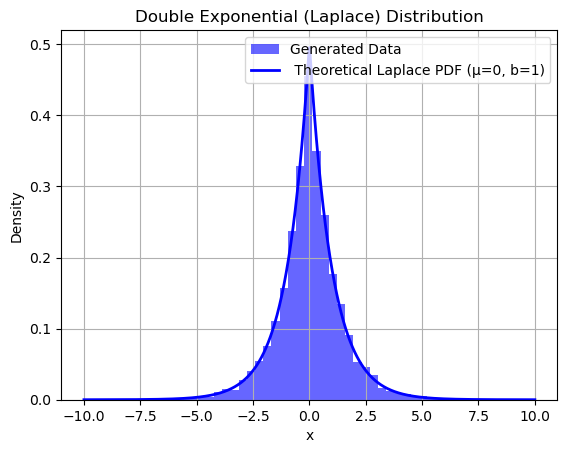

In [12]:
U = np.random.uniform(0, 1, 10000)

left=np.log(2*U)*(U <= 0.5).astype(int)
right=-np.log(-2*(U-1))*(U > 0.5).astype(int)

for i,(el_x,el_y) in enumerate(zip(left,right)):
    if el_x==0:
        left[i]=right[i]
  
plt.hist(left, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")   

x = np.linspace(-10, 10, 1000)
pdf = laplace.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'b-', lw=2, label=f' Theoretical Laplace PDF (μ={0}, b={1})')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Double Exponential (Laplace) Distribution')
plt.legend()
plt.grid()
plt.show()

- Laplace with Radamacher

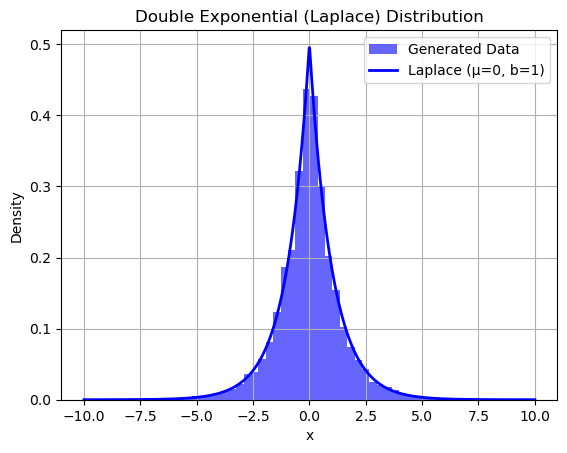

In [13]:
U1 = np.random.uniform(0, 1, 10000)
U2 = np.random.uniform(0, 1, 10000)

#parameters
p=0.5
S = (U1 < p).astype(int)*2-1
Z=-np.log(U2)#exponential


plt.hist(S*Z, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")  
x = np.linspace(-10, 10, 1000)
pdf = laplace.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'b-', lw=2, label=f'Laplace (μ={0}, b={1})')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Double Exponential (Laplace) Distribution')
plt.legend()
plt.grid()
plt.show()
plt.show()

- Normal (Box Muller)

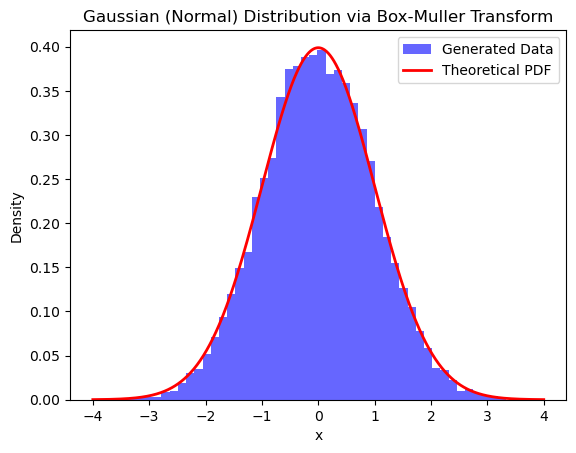

In [15]:
U = np.random.uniform(0, 1, 10000)
V = np.random.uniform(0, 1, 10000)

# Apply Box-Muller Transform
X = np.sqrt(-2 * np.log(U)) * np.cos(2 * np.pi * V)
Y = np.sqrt(-2 * np.log(U)) * np.sin(2 * np.pi * V)
plt.hist(X, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")  

# Plot theoretical Gaussian PDF
x_vals = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x_vals, 0, 1)
plt.plot(x_vals, pdf, 'r-', lw=2, label="Theoretical PDF")

# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Gaussian (Normal) Distribution via Box-Muller Transform")
plt.legend()
plt.show()


- Weilbul

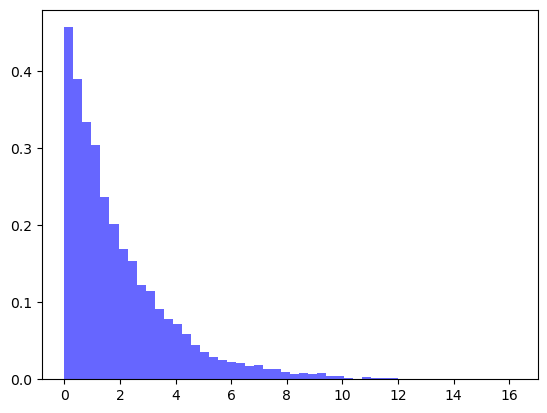

In [16]:
B=2
a=1
U = np.random.uniform(0, 1, 10000)
X = -B*(np.log(U))**(1/a)

# Plot histogram to compare with theoretical PDF
plt.hist(X, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")
plt.show()

- Logistic

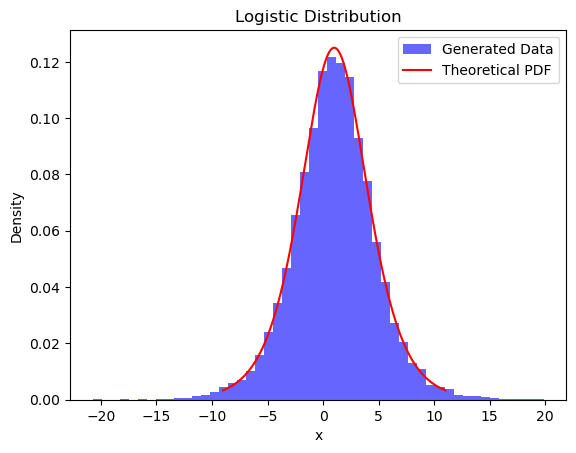

In [20]:

U = np.random.uniform(0, 1, 10000)
a=1
b=2
X=a+b*np.log(U/(1-U))
# Compute PDF and CDF using scipy.stats.logistic
x = np.linspace(a - 5*b, a + 5*b, 1000)
pdf = stats.logistic.pdf(x, loc=a, scale=b)
plt.hist(X, bins=50, density=True, alpha=0.6, color='b', label="Generated Data") 
plt.plot(x, pdf,  color="red",label="Theoretical PDF")


# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Logistic Distribution")
plt.legend()
plt.show()
plt.show()

## *2. Discrete case*

In case of geometric or uniform discrete laws, $CDF$ can be inversed easily, as for example:

- Uniform on K

The cumulative distribution function (CDF) for a **discrete uniform distribution** is given by:

$$
F(k; a, b) = \frac{\lfloor k \rfloor - a + 1}{b - a + 1}
$$

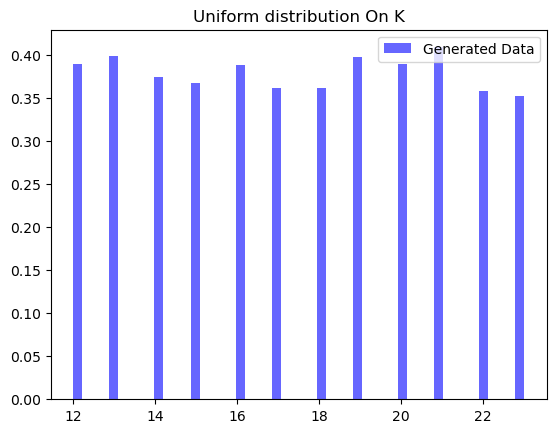

In [23]:
U = np.random.uniform(0, 1, 10000)
a=12
b=23
plt.hist(np.floor((b-a+1)*U-1+a)+1, bins=50, density=True, alpha=0.6, color='b', label="Generated Data") 
plt.title("Uniform distribution On K")
plt.legend()
plt.show()
plt.show()

- Geometric

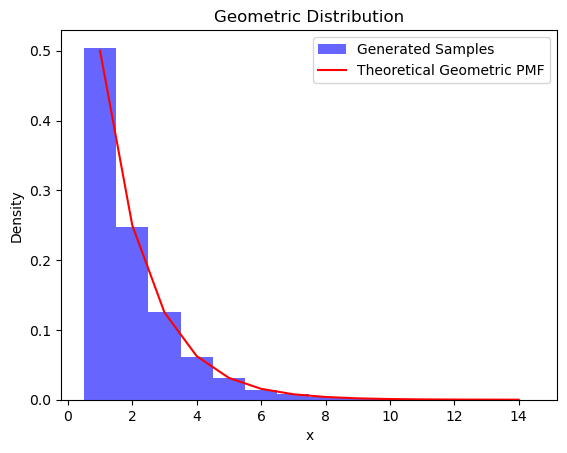

In [29]:
U = np.random.uniform(0, 1, 10000)
p=0.5
#average down to make discrete and start from 1
X = np.floor(np.log(1 - U) / np.log(1 - p))+1
 
plt.hist(X, bins=np.arange(1, np.max(X) + 2) - 0.5,
         density=True, alpha=0.6, color="blue", label="Generated Samples")

x = np.arange(1, np.max(X) + 1)
pmf = stats.geom.pmf(x, p)
plt.plot(x, pmf, 'red', label="Theoretical Geometric PMF")


# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Geometric Distribution")
plt.legend()

plt.show()

In case where CDF is not easily invertible, we use **generalised inverse**:

$$
F^{-1}(u) = \inf \{ x : F(x) \geq u \}
$$


In practice:

- $\bullet$ Sample $U \sim \mathcal{U}[0,1]$
- $\bullet$ If $U \leq p_0$, return $0$
- $\bullet$ If $p_0 < U \leq p_0 + p_1$, return $1$
- $\bullet$ etc.

- Bernouilli

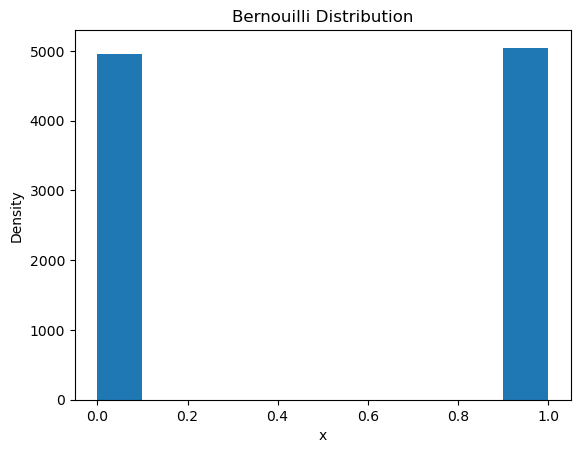

In [37]:
p=0.5
U = np.random.uniform(0, 1, 10000)
X = (U < p).astype(int)
plt.hist(X)
# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Bernouilli Distribution")
plt.show()

- Geometric (instead use direct inverse transformation)

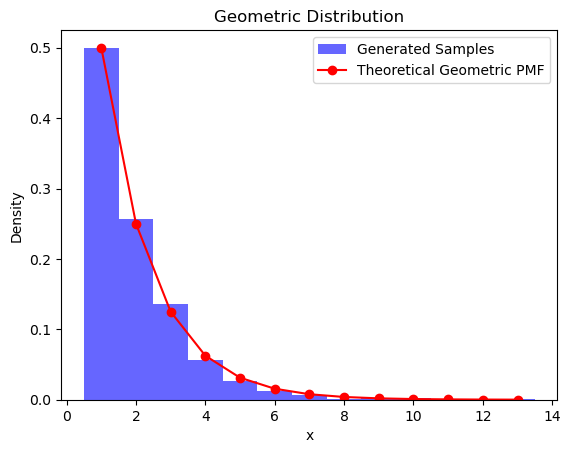

In [52]:
p=0.5
samples=[]
num_repitions=10**3
for el in range(0,num_repitions):
 U = np.random.uniform(0, 1)
 x=  1
 old_cdf=0
 while True:
     new_cdf=1-(1-p)**x#this is cdf so no need to sum, already sumed
     if (U<=new_cdf and U>old_cdf):#exactly cdf quantiles implementation generalised inverse
         break
     x=x+1
     old_cdf=new_cdf
 samples.append(x)
plt.hist(samples, bins=np.arange(1, np.max(samples) + 2) - 0.5, density=True, alpha=0.6, color='b', label="Generated Samples") 
x = np.arange(1, np.max(samples) + 1)
pmf = stats.geom.pmf(x, p)
plt.plot(x, pmf, 'ro-', label="Theoretical Geometric PMF")

# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Geometric Distribution")
plt.legend()

plt.show()
   

- Poisson (only one choice)

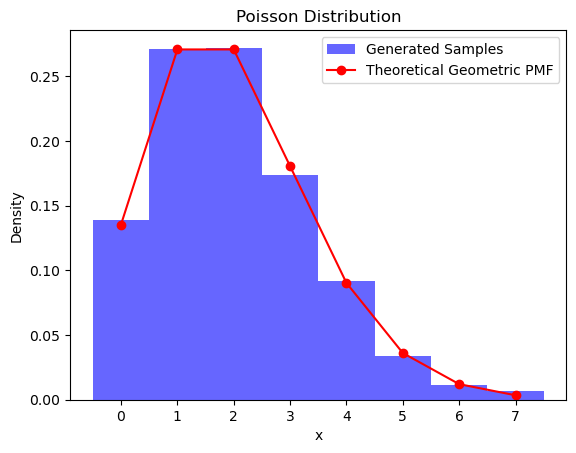

In [54]:
lam=2
samples=[]
num_repitions=10**3
for el in range(0,num_repitions):
 U = np.random.uniform(0, 1)
 x=  0#has to be in order from 0 to inf
 old_cdf=0
 while True:
     new_cdf=old_cdf+np.exp(-lam)*(lam**x)/math.factorial(x)#this is pdf, no cdf!! so sum probability
     if (U<=new_cdf and U>old_cdf):#exactly cdf quantiles implementation generalised inverse
         break
     x=x+1
     old_cdf=new_cdf
 samples.append(x)
 

plt.hist(samples, bins=np.arange(np.max(samples) + 2) - 0.5, density=True, alpha=0.6, color='b', label="Generated Samples") 

# Generate x values for PMF and CDF
x = np.arange(0, np.max(samples) + 1)

# Compute Poisson PMF
pmf = stats.poisson.pmf(x, mu=lam)
plt.plot(x, pmf, 'ro-', label="Theoretical Geometric PMF")

# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Poisson Distribution")
plt.legend()

plt.show()
   

- Binomial

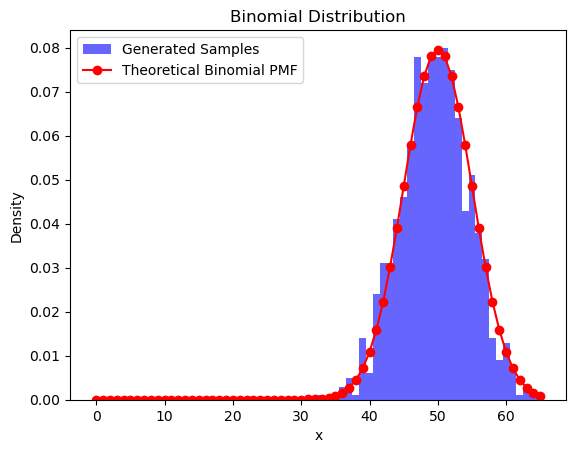

In [60]:
p=0.5
n=100
samples=[]
num_repitions=10**3
for el in range(0,num_repitions):
 U = np.random.uniform(0, 1)
 x=  0#has to be in order from 0 to inf
 old_cdf=0
 while True:

     new_cdf=old_cdf+math.comb(n, x) * (p**x) * ((1 - p)**(n - x))#this is pdf, no cdf!! so sum probability
     if (U<=new_cdf and U>old_cdf):#exactly cdf quantiles implementation generalised inverse
         break
     x=x+1
     old_cdf=new_cdf
 samples.append(x)
 

plt.hist(samples, bins=np.arange(np.max(samples) + 2) - 0.5, density=True, alpha=0.6, color='b', label="Generated Samples") 
x = np.arange(0, np.max(samples) + 1)
pmf = binom.pmf(x, n, p)
plt.plot(x, pmf, 'ro-', label="Theoretical Binomial PMF")
# Labels and Title
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Binomial Distribution")
plt.legend()

plt.show()